<a href="https://colab.research.google.com/github/wp225/housing-data-exploration/blob/main/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
df_train=pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')
df_test=df_test.drop('Id',axis=1)
df_train=df_train.drop('Id',axis=1)

In [ ]:
print(len(df_train.columns))
df_train.info()

80
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearB

<Axes: >

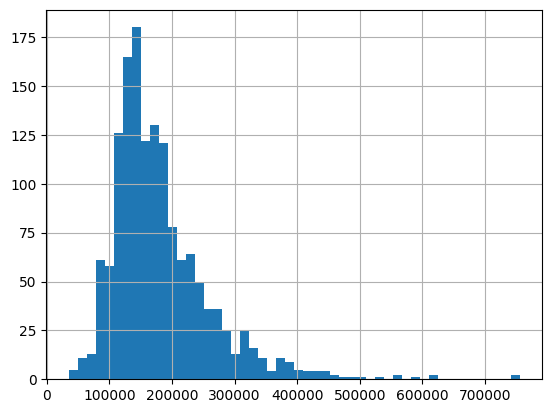

In [ ]:
df_train.SalePrice.hist(bins=50)

+ve skew,
pickdness 

In [ ]:
col_numeric=[]
col_cat=[]
cols=df_train.columns
for i in range(len(cols)):
  if(df_train[cols[i]].dtype=='int64' or df_train[cols[i]].dtype=='float64'):
    col_numeric.append(cols[i])
  elif(df_train[cols[i]].dtype=='object'):
    col_cat.append(cols[i])
  else:
    print(cols[i])

<ipython-input-92-421a08c0913a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df_train.corr()


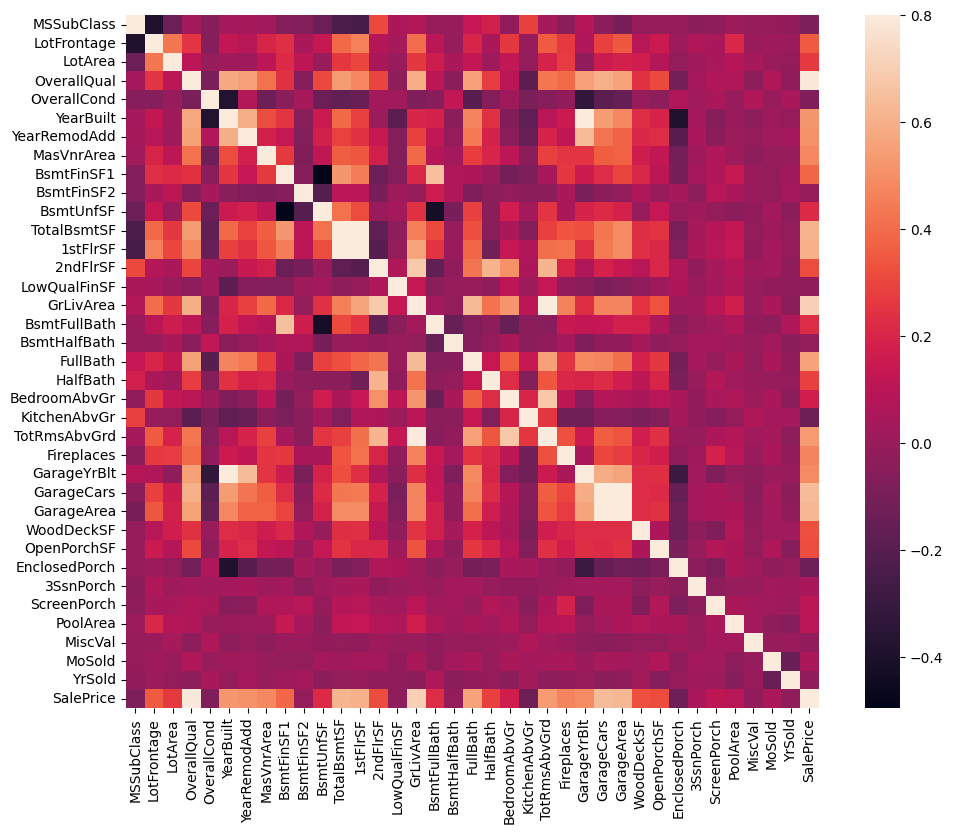

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_mat=df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=.8, square=True);

some high corellation for SalePrice :
overallquality,
enclosedporch,
kitchenaboveground,
grlivarea.

---



In [ ]:
corelation_cols=corr_mat.nlargest(10,'SalePrice')
high_corelation=corelation_cols['SalePrice'].index

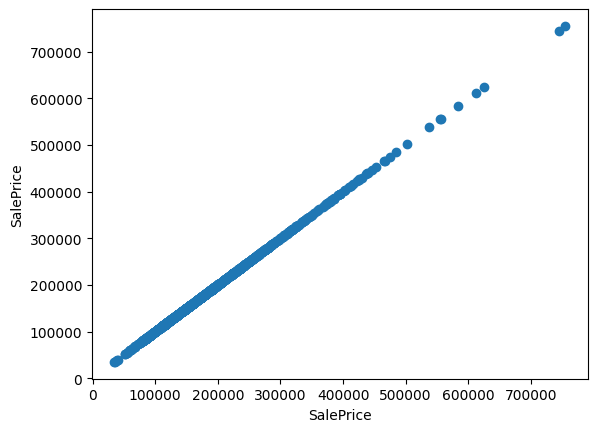

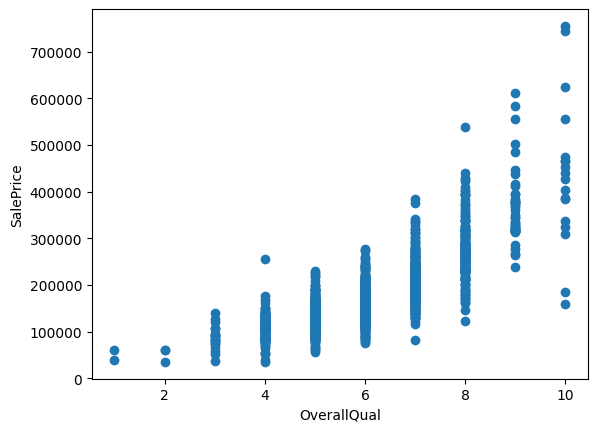

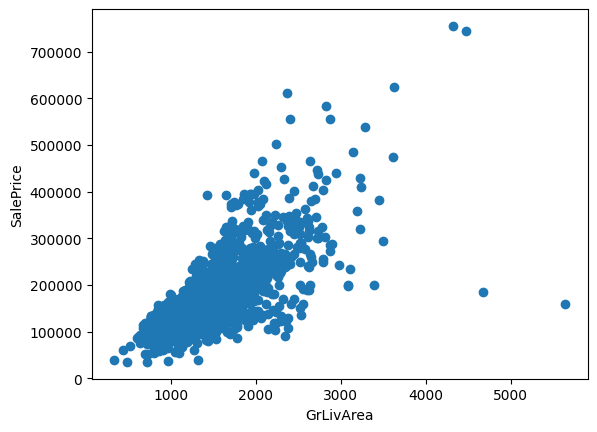

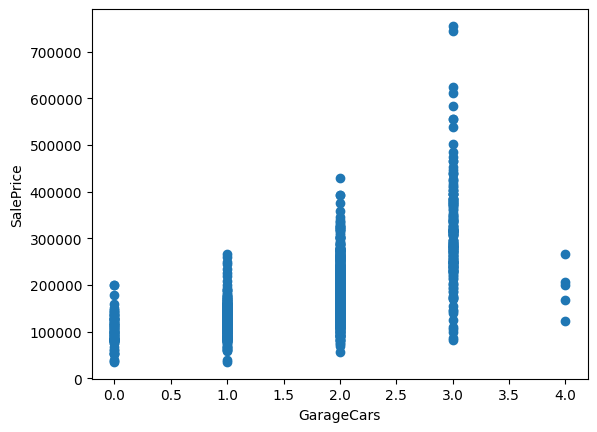

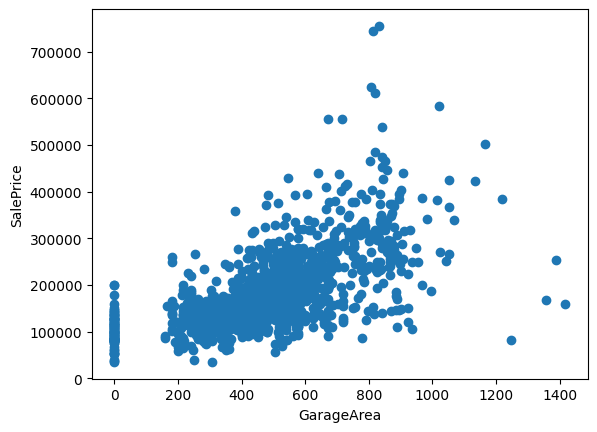

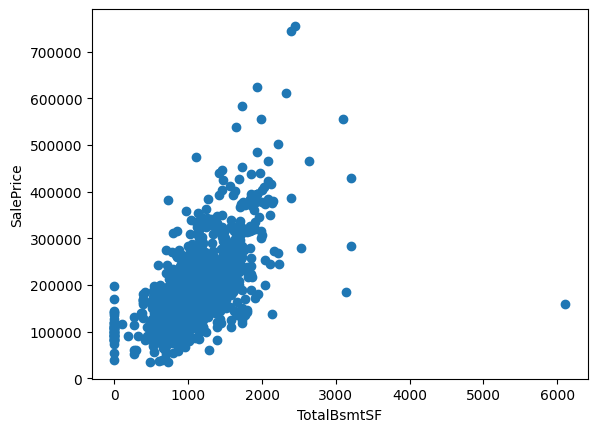

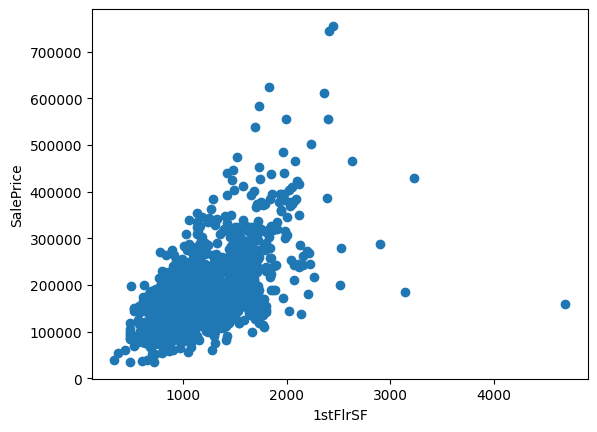

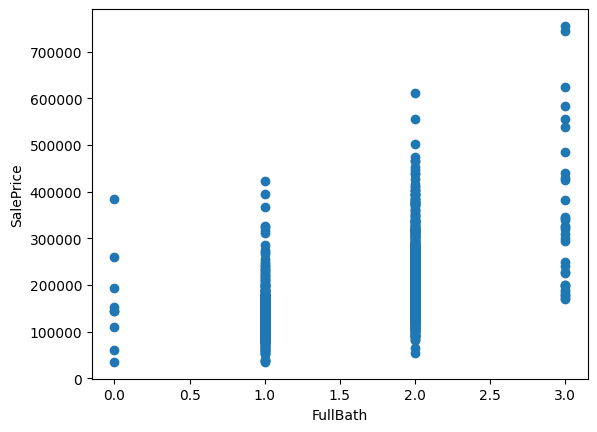

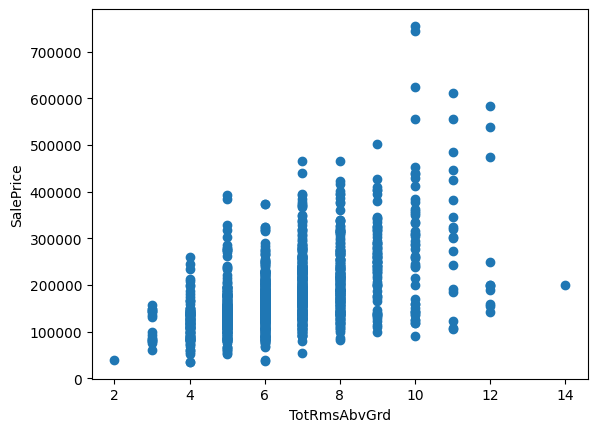

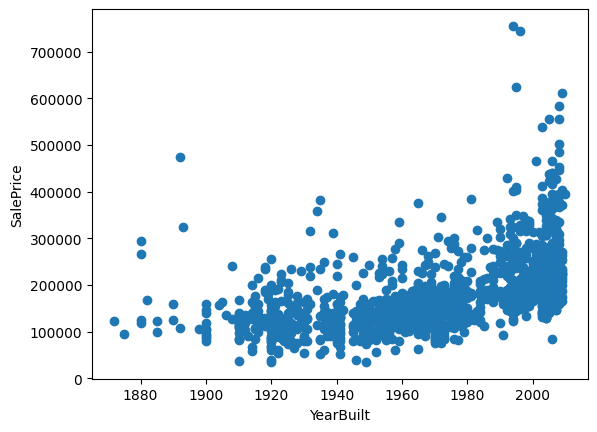

In [ ]:
for col in high_corelation:
  plt.scatter(df_train[col],df_train.SalePrice)
  plt.ylabel('SalePrice')
  plt.xlabel(col)
  plt.show()

linear and exponential relation seen

In [ ]:
cols=df_train.columns
for i in range(len(cols)):
  if df_train[cols[i]].isnull().sum()>0:
    xx=df_train[cols[i]].isnull().sum()/1460
    print(xx,cols[i])

0.1773972602739726 LotFrontage
0.9376712328767123 Alley
0.005479452054794521 MasVnrType
0.005479452054794521 MasVnrArea
0.025342465753424658 BsmtQual
0.025342465753424658 BsmtCond
0.026027397260273973 BsmtExposure
0.025342465753424658 BsmtFinType1
0.026027397260273973 BsmtFinType2
0.0006849315068493151 Electrical
0.4726027397260274 FireplaceQu
0.05547945205479452 GarageType
0.05547945205479452 GarageYrBlt
0.05547945205479452 GarageFinish
0.05547945205479452 GarageQual
0.05547945205479452 GarageCond
0.9952054794520548 PoolQC
0.8075342465753425 Fence
0.963013698630137 MiscFeature


removing all columns with more than 15% data missing 

---BsmtQual , cond, exposure are all highly corellated to enclosedarea soo we can delete them 
---same for GarageXX 
---same for MasVnrXX
for electrical since very few data missing we remove those rows



In [ ]:
df_train=df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

deleting outliers from high corellative columns

In [ ]:
df_train=df_train.drop(df_train.loc[df_train['TotalBsmtSF']>4000].index)
df_train=df_train.drop(df_train.loc[df_train['GrLivArea']>4000].index)


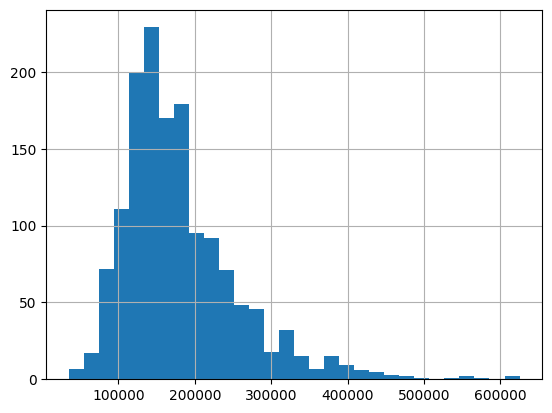

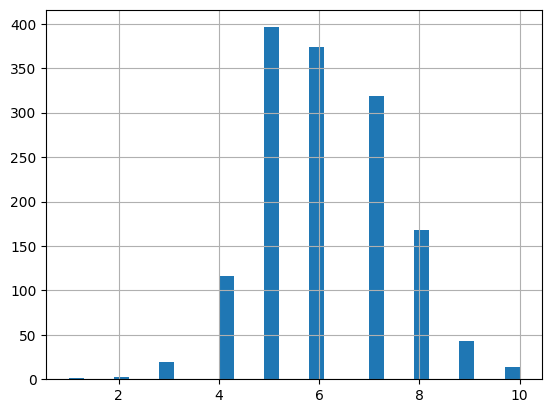

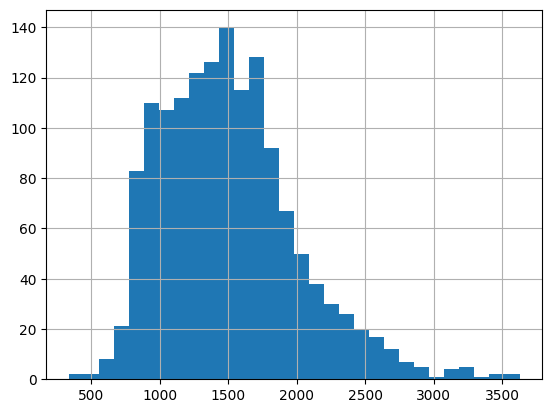

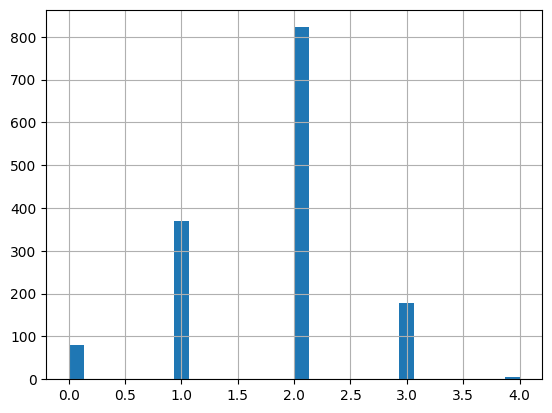

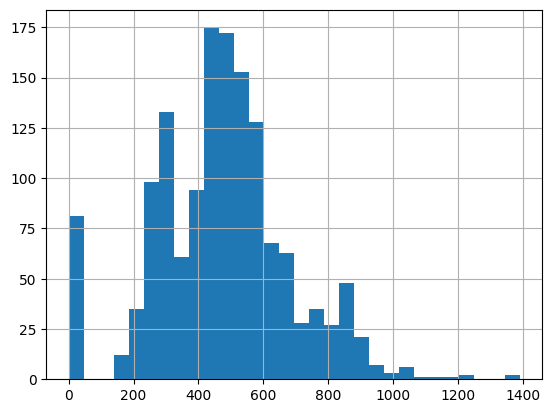

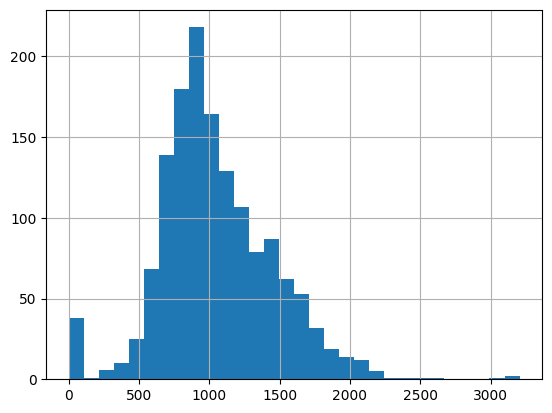

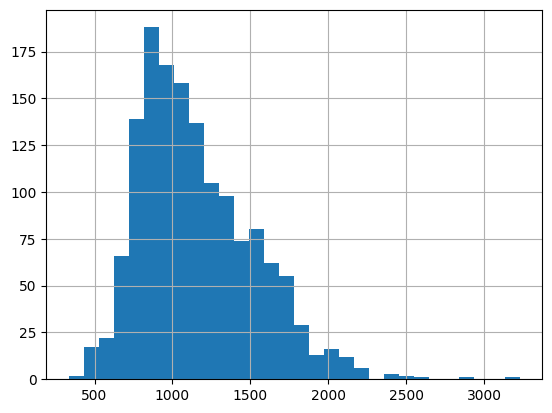

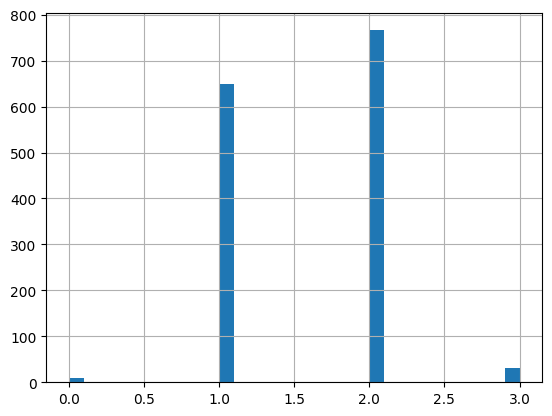

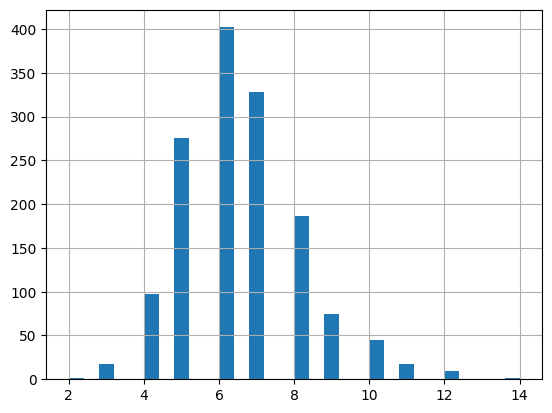

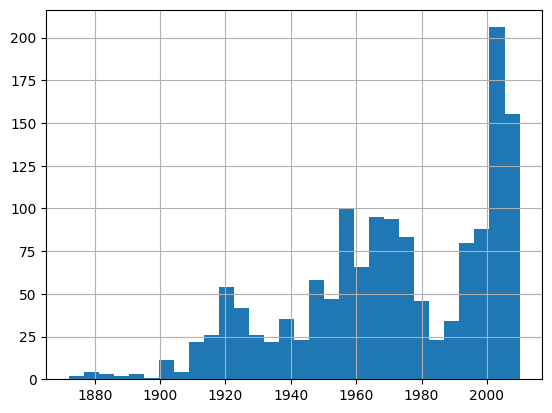

In [ ]:
for col in high_corelation:
  df_train[col].hist(bins=30)
  plt.show()

approx normal ddestribution of many columns 
excepy Saleprice and TotalBsmtSF

In [ ]:
df_train['SalePrice']=np.log(df_train['SalePrice'])
df_train['OverallQual']=np.log(df_train['OverallQual'])
df_train['YearBuilt']=np.log(df_train['YearBuilt'])
df_train['1stFlrSF']=np.log(df_train['1stFlrSF'])
